In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import fix_yahoo_finance as yf  
import pandas_datareader.data as web
from datetime import date, timedelta
import calendar

In [0]:
import tweepy
import csv
import sys,tweepy,csv,re
from textblob import TextBlob

In [0]:
n = 30 #no of days

In [0]:
def stock_prize(stock_nm,N): 
  current_date = date.today()
  days_before = (date.today()-timedelta(days=N))
  print(current_date,"  ",days_before)
   
  data = web.DataReader(stock_nm,'iex',days_before,current_date)
  print(N," days before current date: ",days_before)
  data['difference']= data.close-data.open
  
  return data


In [0]:
name_of_stock = "GOOG"

In [0]:
y=stock_prize(name_of_stock,n) 
print(y)

2019-04-14    2019-03-15
30  days before current date:  2019-03-15
               open     high      low    close   volume  difference
date                                                               
2019-03-15  1193.38  1196.57  1182.61  1184.46  2459957       -8.92
2019-03-18  1183.30  1190.00  1177.42  1184.26  1292633        0.96
2019-03-19  1188.81  1200.00  1185.87  1198.85  1520688       10.04
2019-03-20  1197.35  1227.14  1196.17  1223.97  2227786       26.62
2019-03-21  1216.00  1231.79  1213.15  1231.54  1204045       15.54
2019-03-22  1226.32  1230.00  1202.83  1205.50  1714247      -20.82
2019-03-25  1196.93  1206.40  1187.04  1193.00  1496843       -3.93
2019-03-26  1198.53  1202.83  1176.72  1184.62  1901156      -13.91
2019-03-27  1185.50  1187.56  1159.37  1173.02  1400240      -12.48
2019-03-28  1171.54  1171.57  1159.43  1168.49  1012430       -3.05
2019-03-29  1174.90  1178.99  1162.88  1173.31  1269979       -1.59
2019-04-01  1184.10  1196.66  1182.00  1194.43  1

In [0]:
df_stock = pd.DataFrame()
df_stock['Date'] = y.index
df_stock['difference'] = list(y.difference)

df_stock = df_stock.set_index(['Date'])
df_stock.index = pd.to_datetime(df_stock.index)

df_stock = df_stock.resample('D').ffill().reset_index()

print(df_stock)

         Date  difference
0  2019-03-15       -8.92
1  2019-03-16       -8.92
2  2019-03-17       -8.92
3  2019-03-18        0.96
4  2019-03-19       10.04
5  2019-03-20       26.62
6  2019-03-21       15.54
7  2019-03-22      -20.82
8  2019-03-23      -20.82
9  2019-03-24      -20.82
10 2019-03-25       -3.93
11 2019-03-26      -13.91
12 2019-03-27      -12.48
13 2019-03-28       -3.05
14 2019-03-29       -1.59
15 2019-03-30       -1.59
16 2019-03-31       -1.59
17 2019-04-01       10.33
18 2019-04-02        5.17
19 2019-04-03       -1.56
20 2019-04-04        9.06
21 2019-04-05       -7.84
22 2019-04-06       -7.84
23 2019-04-07       -7.84
24 2019-04-08       -4.05
25 2019-04-09        1.25
26 2019-04-10        1.48
27 2019-04-11        0.66
28 2019-04-12        7.87


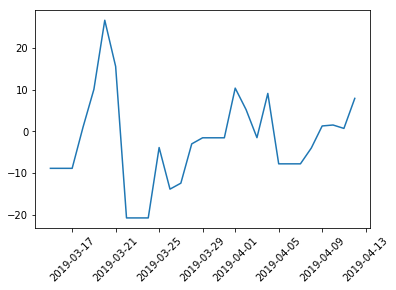

In [0]:
plt.xticks(rotation=45)
plt.plot(df_stock['Date'],df_stock['difference'])

In [0]:
####input your credentials here
consumer_key = 'cCPSWMppGcgKZJpxq4m5yKLF1'
consumer_secret = 'fnrGFRByL1J2cEYdnmzxSmDm4VGSxseJGO6G5JtR1TGsv5wfzA'
access_token = '2320549866-iGRZLF08ix5vICwoTjUELxQU8Acndln4dr2I2LM'
access_token_secret = 'rLiDXi6rocU3KKpjsj3dLtJo1DXZSfPoRa66u8OBIr6N8'
      
# consumer_key = 'MXqj2QwfTjW0hsD2QZlLqI5NI'
# consumer_secret = 'bGjh5h8IVDsRGq6HgbLK8mSBQSQj9uGMTu1cBAweZqncX90IPe'
# access_token = '1101026329808449536-ANuad1jO88XElWXUxXkAZDzJagbOOy'
# access_token_secret = 'dXAliqXRQIF4XmNF5kLPqwmPp7W95LTdmIECGW1fujebQ'


In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [0]:
current_date = date.today().isoformat()   
days_before = (date.today()-timedelta(days=n)).isoformat()

In [0]:
filename = 'tweets_dump_GOOG.csv'

In [0]:
# Open/Create a file to append data
csvFile = open(filename, 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q=name_of_stock,
                           lang="en",
                           since="2019-03-08").items():
    print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])


2019-04-14 18:16:21 https // goog l e com
2019-04-14 18:15:12 RT @HD283271: Goog DESPERATELY PUSHING FAKE NEWS ON THE ATTORNEY GENERAL.

PANIC PANIC PANIC https://t.co/eE4e5JxDmx
2019-04-14 18:12:01 @tsegerblom Goog legislation w/great numbering!
2019-04-14 18:11:49 Very very very very goog job
2019-04-14 18:09:54 @OrangeCMS @googlecloud Despite what the docs say about adding the x-goog-acl:public-read header, I can't get it to work.
2019-04-14 18:09:19 @BTS_twt Goog night Jiminie
2019-04-14 18:07:50 ℊℴℴ𝒹𝓃𝒾ℊ𝒽𝓉 𝒾 𝓁ℴ𝓋ℯ 𝓊 𝒶𝓁𝓁
2019-04-14 17:57:52 RT @theflynews: Twitter fights #spammers by lowering daily #follow limit as Loop says Facebook break-up 'unlikely'. Find out more in "#Soci…
2019-04-14 17:56:29 @DwntwnDave @JSeligmann @EdKrassen Goog luck with that
2019-04-14 17:54:39 @black_goog @rosshighrfc Well done Lucas and the rest of the team!
2019-04-14 17:41:11 @Origengg i'm so proud of you guys! I'm still supporting you, you're The best!
#GoOG
2019-04-14 17:32:27 Stay ahead with Nasdaq 

In [0]:
df = pd.read_csv(filename,header=None,names=['date_time','text'])
df.shape

(4642, 2)

In [0]:
df.head()

,date_time,text
0,2019-04-14 18:16:21,b'https // goog l e com'
1,2019-04-14 18:15:12,b'RT @HD283271: Goog DESPERATELY PUSHING FAKE ...
2,2019-04-14 18:12:01,b'@tsegerblom Goog legislation w/great numberi...
3,2019-04-14 18:11:49,b'Very very very very goog job'
4,2019-04-14 18:09:54,"b""@OrangeCMS @googlecloud Despite what the doc..."


In [0]:
df.dropna(inplace = True) 
date_time_temp = df['date_time'].str.split(" ",n = 1, expand = True)
df['Date'] = date_time_temp[0]
df['Time'] = date_time_temp[1]
df.drop(columns = ['date_time'], inplace = True)
df.head()

,text,Date,Time
0,b'https // goog l e com',2019-04-14,18:16:21
1,b'RT @HD283271: Goog DESPERATELY PUSHING FAKE ...,2019-04-14,18:15:12
2,b'@tsegerblom Goog legislation w/great numberi...,2019-04-14,18:12:01
3,b'Very very very very goog job',2019-04-14,18:11:49
4,"b""@OrangeCMS @googlecloud Despite what the doc...",2019-04-14,18:09:54


### Clean the tweets

In [0]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [0]:
%%time
print ("Cleaning the tweets...\n")
clean_tweet_texts = []
for i in range(0,len(df)):
    if( (i+1)%1000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, len(df) ))
    clean_tweet_texts.append(tweet_cleaner_updated(df['text'][i]))                          

Cleaning the tweets...

Tweets 1000 of 4642 has been processed
Tweets 2000 of 4642 has been processed
Tweets 3000 of 4642 has been processed
Tweets 4000 of 4642 has been processed
CPU times: user 1.66 s, sys: 63.7 ms, total: 1.73 s
Wall time: 1.73 s


In [0]:
df['text'] = clean_tweet_texts

In [0]:
df.head()

,text,Date,Time
0,https goog com,2019-04-14,18:16:21
1,rt goog desperately pushing fake news on the a...,2019-04-14,18:15:12
2,goog legislation great numbering,2019-04-14,18:12:01
3,very very very very goog job,2019-04-14,18:11:49
4,despite what the docs say about adding the goo...,2019-04-14,18:09:54


### Load the model

In [0]:
!pip install pydrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
def GoogleDriveAuth(ID):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    file = drive.CreateFile({'id': ID})
    return file

In [0]:
# https://drive.google.com/open?id=1qgN3jKOgV7mdui8OEL6mc8pzw32UBJzG
File_ID = '1qgN3jKOgV7mdui8OEL6mc8pzw32UBJzG'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('finalized_model.sav')

In [0]:
import pickle

filename_model = 'finalized_model.sav'
# load the model from disk
loaded_model = pickle.load(open(filename_model, 'rb'))
# result = loaded_model.score(x_test, y_test)
# print(result)

In [0]:
list_of_tweets = df['text']

In [0]:
y_pred = loaded_model.predict(list_of_tweets)
print(y_pred)
y_pred.shape

[1 1 1 ... 1 1 1]


(4642,)

In [0]:
df['sentiment'] = y_pred

In [0]:
print(df)

                                                   text        Date      Time  \
0                                        https goog com  2019-04-14  18:16:21   
1     rt goog desperately pushing fake news on the a...  2019-04-14  18:15:12   
2                      goog legislation great numbering  2019-04-14  18:12:01   
3                          very very very very goog job  2019-04-14  18:11:49   
4     despite what the docs say about adding the goo...  2019-04-14  18:09:54   
5                                    goog night jiminie  2019-04-14  18:09:19   
6     xe xe xb xe xb xf xb xf xf xbe xe xf xbd xf xc...  2019-04-14  18:07:50   
7     rt twitter fights spammers by lowering daily f...  2019-04-14  17:57:52   
8                                   goog luck with that  2019-04-14  17:56:29   
9              well done lucas and the rest of the team  2019-04-14  17:54:39   
10    so proud of you guys still supporting you you ...  2019-04-14  17:41:11   
11    stay ahead with nasdaq

In [0]:
df = df.sort_values(['Date', 'Time'], ascending = [True, True]).reset_index(drop = True)

In [0]:
print(df)

                                                   text        Date      Time  \
0     screen through high rated articles for us tech...  2019-04-05  01:09:33   
1                                    goog moaning xf xb  2019-04-05  01:13:45   
2     see lots of familiar names on there gern vktx ...  2019-04-05  01:19:28   
3     rt big scoop in the ai world from ian goodfell...  2019-04-05  01:19:39   
4     rt as companies move away from fb goog podcast...  2019-04-05  01:22:10   
5                                                  goog  2019-04-05  01:22:39   
6     xf dwe moved from heroku to google kubernetes ...  2019-04-05  01:25:11   
7     ndaa superceding smithmundtact allows propagan...  2019-04-05  01:26:07   
8     after an employee backlash google has cancelle...  2019-04-05  01:26:33   
9     swear ve been as honest as can be ntaqiyya is ...  2019-04-05  01:27:34   
10    rt big scoop in the ai world from ian goodfell...  2019-04-05  01:28:06   
11    rt verb officially on 

In [0]:
df_visualize = df[['Date', 'sentiment']]
df_visualize
# df_visualize = df_visualize.drop('text',axis = 1)
# df_visualize = df_visualize.drop('Time',axis = 1)

,Date,sentiment
0,2019-04-05,1
1,2019-04-05,1
2,2019-04-05,1
3,2019-04-05,1
4,2019-04-05,1
5,2019-04-05,1
6,2019-04-05,1
7,2019-04-05,1
8,2019-04-05,0
9,2019-04-05,1


In [0]:
df_visualize['freq'] = df_visualize.groupby(['Date','sentiment'])['Date'].transform('count')
df_visualize = df_visualize.drop_duplicates()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_visualize

,Date,sentiment,freq
0,2019-04-05,1,339
8,2019-04-05,0,101
440,2019-04-06,1,209
444,2019-04-06,0,82
731,2019-04-07,0,59
732,2019-04-07,1,215
1005,2019-04-08,0,80
1006,2019-04-08,1,508
1593,2019-04-09,1,814
1622,2019-04-09,0,86


### Combine sentiment ( positive + negative ) tweets

In [0]:
df_positive = df_visualize.loc[df_visualize['sentiment'] == 1.0]
df_positive = df_positive.drop('sentiment',axis = 1)
df_positive = df_positive.reset_index(drop = True)
print(df_positive)

         Date  freq
0  2019-04-05   339
1  2019-04-06   209
2  2019-04-07   215
3  2019-04-08   508
4  2019-04-09   814
5  2019-04-10   396
6  2019-04-11   472
7  2019-04-12   408
8  2019-04-13   242
9  2019-04-14   227


In [0]:
df_negative = df_visualize.loc[df_visualize['sentiment'] == 0]
df_negative = df_negative.drop('sentiment',axis = 1)
df_negative = df_negative.reset_index(drop = True)
print(df_negative)

         Date  freq
0  2019-04-05   101
1  2019-04-06    82
2  2019-04-07    59
3  2019-04-08    80
4  2019-04-09    86
5  2019-04-10   119
6  2019-04-11   123
7  2019-04-12    89
8  2019-04-13    29
9  2019-04-14    44


In [0]:
difference = df_positive['freq'] - df_negative['freq']
print(difference)

0    238
1    127
2    156
3    428
4    728
5    277
6    349
7    319
8    213
9    183
Name: freq, dtype: int64


In [0]:
df_positive['sentiment_difference'] = difference
print(df_positive)

         Date  freq  sentiment_difference
0  2019-04-05   339                   238
1  2019-04-06   209                   127
2  2019-04-07   215                   156
3  2019-04-08   508                   428
4  2019-04-09   814                   728
5  2019-04-10   396                   277
6  2019-04-11   472                   349
7  2019-04-12   408                   319
8  2019-04-13   242                   213
9  2019-04-14   227                   183


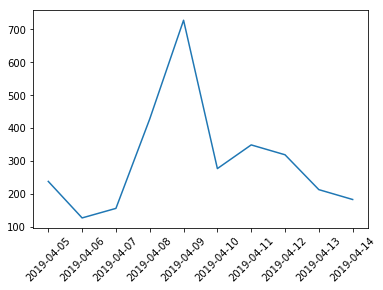

In [0]:
plt.xticks(rotation=45)
plt.plot(df_positive['Date'],df_positive['sentiment_difference'])

In [0]:
pos_difference = df_positive['sentiment_difference']
print(pos_difference)

0    238
1    127
2    156
3    428
4    728
5    277
6    349
7    319
8    213
9    183
Name: sentiment_difference, dtype: int64


In [0]:
pos_difference = 2 * (pos_difference - pos_difference.min())
print(pos_difference)

0     222
1       0
2      58
3     602
4    1202
5     300
6     444
7     384
8     172
9     112
Name: sentiment_difference, dtype: int64


In [0]:
pos_difference = df_positive['sentiment_difference']
# pos_difference = (pos_difference - pos_difference.mean())/pos_difference.std()
pos_difference = (2 *(pos_difference - pos_difference.min()) / (pos_difference.max() - pos_difference.min())) - 1
df_positive['sentiment_difference'] = pos_difference
df_positive = df_positive.reset_index(drop = True)
print(df_positive)

         Date  freq  sentiment_difference
0  2019-04-05   339             -0.630616
1  2019-04-06   209             -1.000000
2  2019-04-07   215             -0.903494
3  2019-04-08   508              0.001664
4  2019-04-09   814              1.000000
5  2019-04-10   396             -0.500832
6  2019-04-11   472             -0.261231
7  2019-04-12   408             -0.361065
8  2019-04-13   242             -0.713810
9  2019-04-14   227             -0.813644


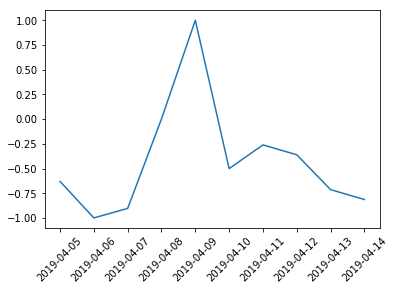

In [0]:
plt.xticks(rotation=45)
plt.plot(df_positive['Date'],df_positive['sentiment_difference'])

In [0]:
df_final = df_positive
df_final['stock_difference'] = df_stock['difference']
stock_difference = df_final['stock_difference']
stock_difference = (2 *(stock_difference - stock_difference.min()) / (stock_difference.max() - stock_difference.min())) - 1
df_final['stock_difference'] = stock_difference
print(df_final)

         Date  freq  sentiment_difference  stock_difference
0  2019-04-05   339             -0.630616         -0.498314
1  2019-04-06   209             -1.000000         -0.498314
2  2019-04-07   215             -0.903494         -0.498314
3  2019-04-08   508              0.001664         -0.081788
4  2019-04-09   814              1.000000          0.301012
5  2019-04-10   396             -0.500832          1.000000
6  2019-04-11   472             -0.261231          0.532884
7  2019-04-12   408             -0.361065         -1.000000
8  2019-04-13   242             -0.713810         -1.000000
9  2019-04-14   227             -0.813644         -1.000000


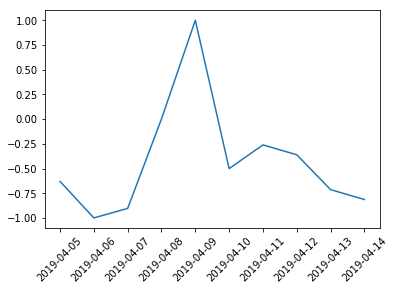

In [0]:
plt.xticks(rotation=45)
plt.plot(df_final['Date'],df_final['sentiment_difference'])

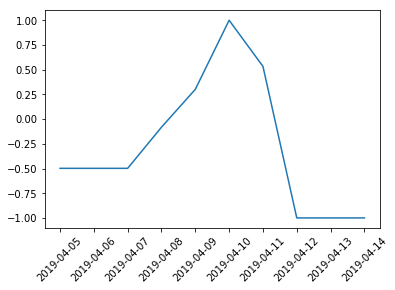

In [0]:
plt.xticks(rotation=45)
plt.plot(df_final['Date'],df_final['stock_difference'])

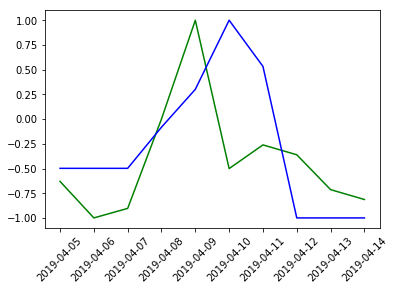

In [0]:
plt.xticks(rotation=45)
plt.plot(df_final['Date'],df_final['sentiment_difference'],'g')
plt.plot(df_final['Date'],df_final['stock_difference'],'b')
plt.show()

### Take positive and negative tweets seperately for normalization

In [0]:
df_positive = df_visualize.loc[df_visualize['sentiment'] == 1.0]
df_positive = df_positive.drop('sentiment',axis = 1)
print(df_positive)

            Date  freq
0     2019-04-05   339
440   2019-04-06   209
732   2019-04-07   215
1006  2019-04-08   508
1593  2019-04-09   814
2493  2019-04-10   396
3008  2019-04-11   472
3604  2019-04-12   408
4100  2019-04-13   242
4371  2019-04-14   227


In [0]:
pos_freq = df_positive['freq']
pos_freq = (pos_freq - pos_freq.mean())/pos_freq.std()
df_positive['freq'] = pos_freq
df_positive = df_positive.reset_index(drop = True)
print(df_positive)

         Date      freq
0  2019-04-05 -0.235282
1  2019-04-06 -0.930433
2  2019-04-07 -0.898349
3  2019-04-08  0.668414
4  2019-04-09  2.304692
5  2019-04-10  0.069515
6  2019-04-11  0.475911
7  2019-04-12  0.133683
8  2019-04-13 -0.753971
9  2019-04-14 -0.834181


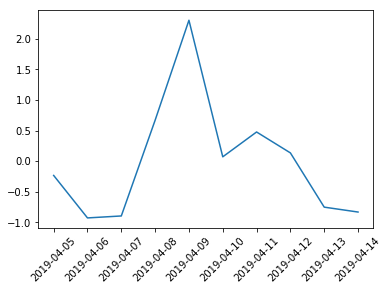

In [0]:
plt.xticks(rotation=45)
plt.plot(df_positive['Date'],df_positive['freq'])

In [0]:
df_negative = df_visualize.loc[df_visualize['sentiment'] == 0]
df_negative = df_negative.drop('sentiment',axis = 1)
print(df_negative)

            Date  freq
8     2019-04-05   101
444   2019-04-06    82
731   2019-04-07    59
1005  2019-04-08    80
1622  2019-04-09    86
2496  2019-04-10   119
3010  2019-04-11   123
3603  2019-04-12    89
4115  2019-04-13    29
4373  2019-04-14    44


In [0]:
neg_freq = df_negative['freq']
neg_freq = (neg_freq - neg_freq.mean())/neg_freq.std()
df_negative['freq'] = neg_freq
df_negative = df_negative.reset_index(drop = True)
print(df_negative)

         Date      freq
0  2019-04-05  0.653751
1  2019-04-06  0.026414
2  2019-04-07 -0.732993
3  2019-04-08 -0.039621
4  2019-04-09  0.158485
5  2019-04-10  1.248069
6  2019-04-11  1.380140
7  2019-04-12  0.257538
8  2019-04-13 -1.723524
9  2019-04-14 -1.228259


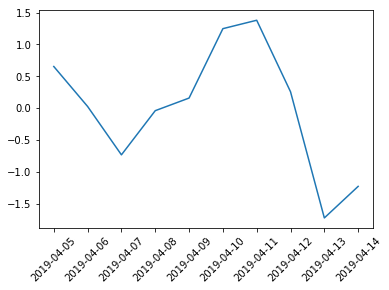

In [0]:
plt.xticks(rotation=45)
plt.plot(df_negative['Date'],df_negative['freq'])

In [0]:
# df_final = pd.DataFrame(index = df_negative['Date'])
df_final = pd.DataFrame()

In [0]:
df_final['Date'] = df_negative['Date']
difference = df_positive['freq'] - df_negative['freq']
df_final['sentiment_difference'] = difference
df_final['stock_difference'] = df_stock['difference']
stock_difference = df_final['stock_difference']
stock_difference = (stock_difference - stock_difference.mean())/stock_difference.std()
df_final['stock_difference'] = stock_difference
print(df_final)

         Date  sentiment_difference  stock_difference
0  2019-04-05             -0.889032         -0.321361
1  2019-04-06             -0.956847         -0.321361
2  2019-04-07             -0.165355         -0.321361
3  2019-04-08              0.708035          0.276127
4  2019-04-09              2.146207          0.825235
5  2019-04-10             -1.178554          1.827902
6  2019-04-11             -0.904229          1.157845
7  2019-04-12             -0.123855         -1.041008
8  2019-04-13              0.969553         -1.041008
9  2019-04-14              0.394078         -1.041008


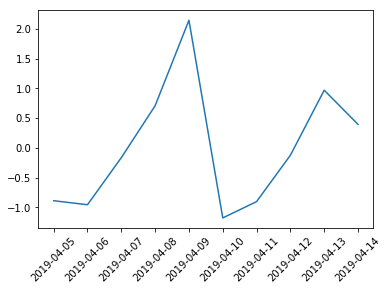

In [0]:
plt.xticks(rotation=45)
plt.plot(df_final['Date'],df_final['sentiment_difference'])

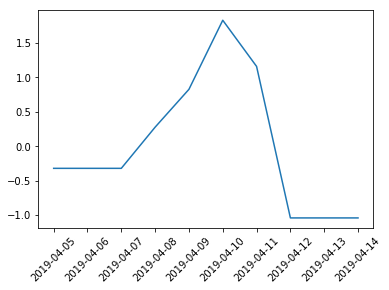

In [0]:
plt.xticks(rotation=45)
plt.plot(df_final['Date'],df_final['stock_difference'])

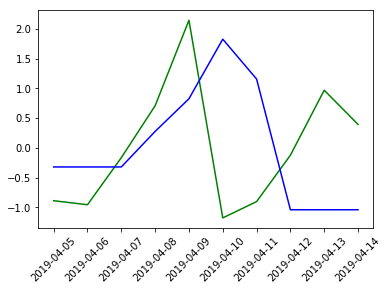

In [0]:
plt.xticks(rotation=45)
plt.plot(df_final['Date'],df_final['sentiment_difference'],'g')
plt.plot(df_final['Date'],df_final['stock_difference'],'b')
plt.show()